<a href="https://colab.research.google.com/github/abrahammathews2000/search4cyberplanet/blob/main/shape_prediction_from_lc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from PIL import Image
from skimage.color import rgb2gray
import glob

In [ ]:
import os

In [ ]:
base_dir = '/content/drive/MyDrive/5_AstroFYP_data/'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of Input Folder:")
print(os.listdir(f'{base_dir}/lc_array'))
lc_train_list = sorted(os.listdir(f'{base_dir}/lc_array/lc_array_train'))
lc_test_list = sorted(os.listdir(f'{base_dir}/lc_array/lc_array_test'))

print('lc_train_list = ',lc_train_list)
print('lc_test_list = ',lc_test_list)

print("\nContents of Output Folder:")
print(os.listdir(f'{base_dir}/shape_image'))

shape_image_test_list = sorted(os.listdir(f'{base_dir}/shape_image/shape_image_test'))
shape_image_train_list = sorted(os.listdir(f'{base_dir}/shape_image/shape_image_train'))

print('shape_image_train_list = ',shape_image_train_list)
print('shape_image_test_list = ',shape_image_test_list)

Contents of base directory:
['lc_array_old', 'shape_image_old', 'shape_image', 'lc_array']

Contents of Input Folder:
['lc_array_train', 'lc_array_test']
lc_train_list =  ['0.0_0.0_10_0lc.csv', '0.0_0.0_10_1lc.csv', '0.0_0.0_3_0lc.csv', '0.0_0.0_3_1lc.csv', '0.0_0.0_4_0lc.csv', '0.0_0.0_4_1lc.csv', '0.0_0.0_5_0lc.csv', '0.0_0.0_5_1lc.csv', '0.0_0.0_6_0lc.csv', '0.0_0.0_6_1lc.csv', '0.0_0.0_7_0lc.csv', '0.0_0.0_7_1lc.csv', '0.0_0.0_8_0lc.csv', '0.0_0.0_8_1lc.csv', '0.0_0.0_9_0lc.csv', '0.0_0.0_9_1lc.csv', '0.0_1.0_10_0lc.csv', '0.0_1.0_10_1lc.csv', '0.0_1.0_3_0lc.csv', '0.0_1.0_3_1lc.csv', '0.0_1.0_4_0lc.csv', '0.0_1.0_4_1lc.csv', '0.0_1.0_5_0lc.csv', '0.0_1.0_5_1lc.csv', '0.0_1.0_6_0lc.csv', '0.0_1.0_6_1lc.csv', '0.0_1.0_7_0lc.csv', '0.0_1.0_7_1lc.csv', '0.0_1.0_8_0lc.csv', '0.0_1.0_8_1lc.csv', '0.0_1.0_9_0lc.csv', '0.0_1.0_9_1lc.csv', '0.0_2.0_10_0lc.csv', '0.0_2.0_10_1lc.csv', '0.0_2.0_3_0lc.csv', '0.0_2.0_3_1lc.csv', '0.0_2.0_4_0lc.csv', '0.0_2.0_4_1lc.csv', '0.0_2.0_5_0lc.csv', '0.

In [ ]:
#Training input (light-curve)
os.chdir('/content/drive/MyDrive/5_AstroFYP_data/lc_array/lc_array_train')
df_lc_train_list = (pd.read_csv(file) for file in lc_train_list)
big_df_lc_train_list_Trans   = pd.concat(df_lc_train_list, axis = 1)
big_df_lc_train_list = big_df_lc_train_list_Trans.T
np_lc_train_list = big_df_lc_train_list.to_numpy()
print(np_lc_train_list.shape)

(800, 99)


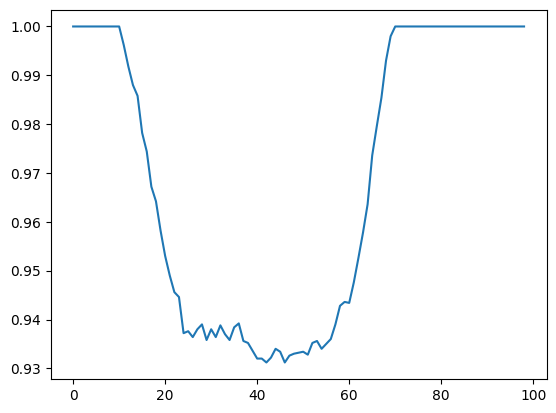

In [ ]:
# Plot Training input (light-curve)
y = np_lc_train_list[5]
x = np.arange(len(y))

plt.plot(x,y)
plt.show()

In [ ]:
#Testing input (light-curve)
os.chdir('/content/drive/MyDrive/5_AstroFYP_data/lc_array/lc_array_test')
df_lc_test_list = (pd.read_csv(file) for file in lc_test_list)
big_df_lc_test_list_Trans   = pd.concat(df_lc_test_list, axis = 1)
big_df_lc_test_list = big_df_lc_test_list_Trans.T
np_lc_test_list = big_df_lc_test_list.to_numpy()
print(np_lc_test_list.shape)

(400, 99)


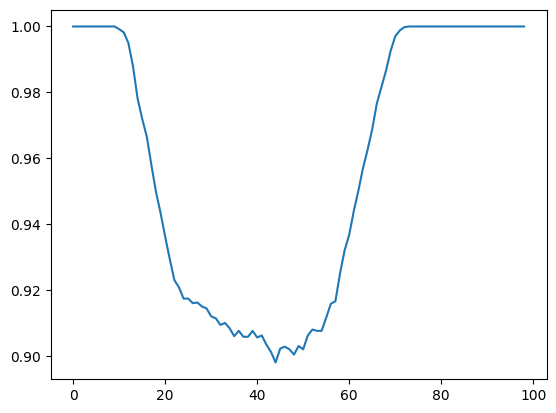

In [ ]:
# Plot Testing input (light-curve)
y = np_lc_test_list[5]
x = np.arange(len(y))

plt.plot(x,y)
plt.show()

In [ ]:
# https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/
# Get CSV files list from a folder
#path = '/content/drive/MyDrive/5_AstroFYP_data/lc_array/lc_array_train'
#csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_lc_train_list = (pd.read_csv(file) for file in lc_train_list)

# Concatenate all DataFrames
#big_df   = pd.concat(df_list, ignore_index=True)
big_df_lc_train_list_Trans   = pd.concat(df_lc_train_list, axis = 1)

In [ ]:
#print(big_df)
big_df_lc_train_list = big_df_lc_train_list_Trans.T
np_lc_train_list = big_df_lc_train_list.to_numpy()
print(np_lc_train_list.shape)

(800, 99)


In [ ]:
# Taking long time
#os.chdir('/content/drive/MyDrive/5_AstroFYP_data/lc_array/lc_array_train')
#df_lc_train_list = pd.concat(map(pd.read_csv, lc_train_list))

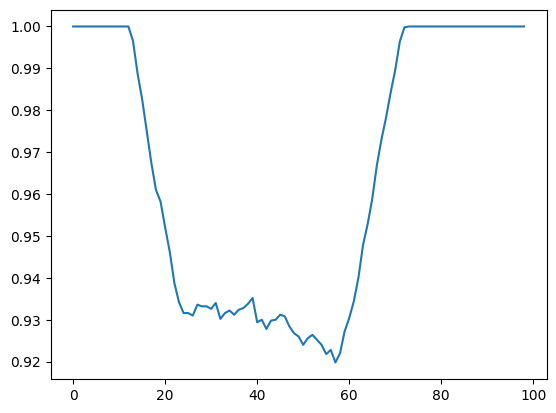

In [ ]:
# Trying to open one lc_array csv file
df = pd.read_csv('/content/drive/MyDrive/5_AstroFYP_data/lc_array/0.0_0.0_10_0lc.csv')
y = np.array(df)
#print("length of y = ",len(y))
x = np.arange(len(y))
#print(y)
#print(x)
plt.plot(x,y)
plt.show()

(100, 100)


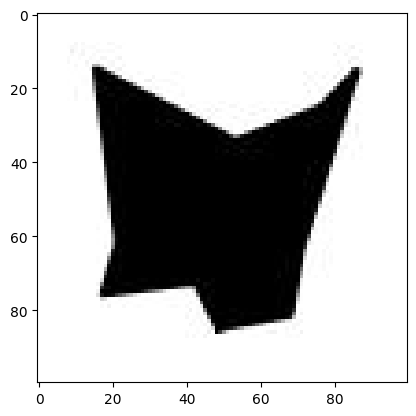

In [ ]:
img = np.asarray(Image.open('/content/drive/MyDrive/5_AstroFYP_data/shape_image_old/0.0_0.0_10_0.jpg'))
img_gray = rgb2gray(img) # Convert rgb 2 gray
img_gray = img_gray/255.0

print(img_gray.shape)
#print(repr(img))
plt.imshow(img_gray,cmap="gray")

In [ ]:
inputs = keras.Input(shape=(99,))

dense = layers.Dense(5000, activation="relu")

x = dense(inputs)
x = layers.Dense(5000, activation="relu")(x)
outputs = layers.Dense(10000)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="predict_shape_from_LC")

In [ ]:
model.summary()


Model: "predict_shape_from_LC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_3 (Dense)             (None, 5000)              505000    
                                                                 
 dense_4 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_5 (Dense)             (None, 10000)             50010000  
                                                                 
Total params: 75,520,000
Trainable params: 75,520,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
inputs.shape
inputs.dtype

tf.float32

Old codes

In [ ]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(units=100, input_shape=[100]),
    tf.keras.layers.Dense(5000, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10000, activation=tf.nn.relu),
    tf.keras.layers.Reshape((100, 100))])
model.compile(optimizer='sgd', loss='mean_squared_error')



In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 5000)              505000    
                                                                 
 dense_21 (Dense)            (None, 10000)             50010000  
                                                                 
 reshape_2 (Reshape)         (None, 100, 100)          0         
                                                                 
Total params: 50,525,100
Trainable params: 50,525,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])